# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [2]:
# Passo 1: Entendimento do Desafio
# Passo 2: Entendimento da Área/Empresa
     # Preve o preço de um barco de acordo com as caracteriscas dele: ano, material, usado/novo etc.

# Passo 3: Extração/Obtenção de Dados

import pandas as pd
tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


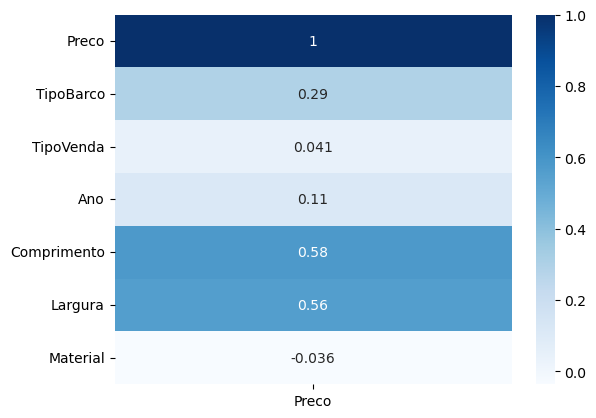

In [3]:

# Passo 5: Análise Exploratória
# Correlação entre as informações da base de dados.
correlacao = tabela.corr()[["Preco"]] # .corr() mostra a correlação da tabela.
display(correlacao)        # Colocando entre conchetes duplos a coluna Preco, so ela aparecerá no display em vez da tabela completa.

import seaborn as sns      # seaborn para criar gráficos também  # sns é apelido á ele dado
import matplotlib.pyplot as plt          # matplotlib.pyplot para criar gráficos também.  # plt é apelido á ele dado.

# Criar o gráfico
sns.heatmap(correlacao, cmap="Blues", annot=True)  # heatmap é o tipo do gráfico.  # cmap :color maps é a cor do grafico. # annot=True serve para exibir os textos e números no gráfico. 

# Exibir o gráfico
plt.show()                 # plt é o apelido dado ao matplotlib.pyplot. juntando ele com .show() exibe o gráfico na tela.

In [4]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)

#----------------------------------------------------------------------------------------------------
# 1ª Divisão : Dividir a base em x e y

y = tabela["Preco"]

# o axis = 0 -> linhas e axis= 1 -> colunas

x = tabela.drop("Preco", axis=1)  # Aqui é excluida a coluna "Preço" para que fique só as demais colunas.

#--------------------------------------------------------------------------------------------------------

# 2 ª divisão: train test split   : divisão em treino e teste  : vai dividir o que vai ser treinado e o que vai ser testado.

from sklearn.model_selection import train_test_split   # "sklearn" é um pacote importante de inteligencia artificial do python e dentro dele tem a função "train test split" que vai pegar os dados x e y e transformar em dados de treino e dados de teste.

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y , test_size=0.3 , random_state=1)  # x_treino , x_teste ,y_treino e y_teste vão receber "train_test_split(x,y, test_size=0,3) onde "test_size=0,3" coloca só 30% para teste e o restan fica para treino. O "random_state=1" é para quando rodar o código de forma aleatória não mudar os resultados toda hora. 

In [5]:
# Importar a inteligencia artificial

# 1ª Regressão linear e 2ª Arvore de decisão

from sklearn.linear_model import LinearRegression # foi importada dentro do pacote sklearn a inteligência artificial "Regressão Linear" 
from sklearn.ensemble import RandomForestRegressor # foi importada dentro do pacote sklearn a inteligência artificial "Arvore de decisão"

# Criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [6]:
# Passo 7: Interpretação de Resultados

# Escolher o melhor modelo -> r² calcula o percentual % de precisão das duas inteligencias: "Regressão linear" e  "Arvore de decisão"

from sklearn.metrics import r2_score  # pega no pacote sklearn.metrics a função r²_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste) # cria um variável com nome : "previsao_regressaolinear" que recebe a variável  :"modelo_regressaolinear" junto com ".predict" que quer dizer "prever" a base de dados "x_teste"
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)  # cria um variável com nome : "previsao_arvoredecisao" que recebe a variável  :"modelo_arvoredecisao" junto com ".predict" que quer dizer "prever" a base de dados "x_teste"

print(r2_score(y_teste, previsao_regressaolinear)) # agora vai printar o "r2_score" e comparar o y_teste com a "previsao_regressaolinear" x_teste
print(r2_score(y_teste, previsao_arvoredecisao)) # agora vai printar o "r2_score" e comparar o y_teste com a "previsao_arvoredecisao" x_teste

0.4490324760735811
0.853241022386547


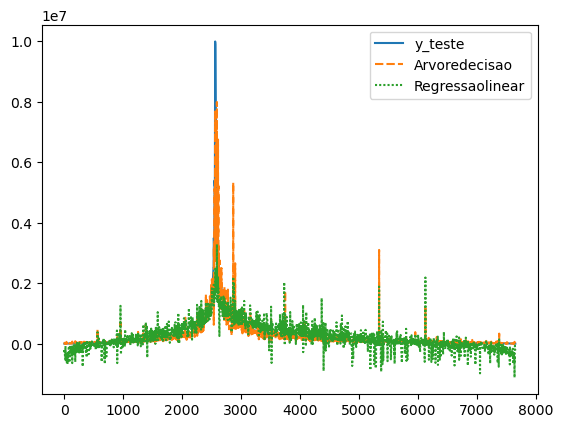

In [7]:
# Visualizar as previsões

tabela_auxiliar = pd.DataFrame() # criou variável "tabela_auxiliar" que recebe "pd.DataFrame" que é uma tabela vazia.
tabela_auxiliar["y_teste"] = y_teste   # aqui vai acrescentar um coluna "y_teste"
tabela_auxiliar["Arvoredecisao"] = previsao_arvoredecisao  # aqui vai acrescentar um coluna "Arvoredecisao"
tabela_auxiliar["Regressaolinear"] = previsao_regressaolinear # aqui vai acrescentar um coluna "Regressaolinear"

sns.lineplot(data=tabela_auxiliar) # cria um gráfico de linha : "lineplot" onde os dados:"data" recebe a " tabela_auxiliar"
plt.show()

In [12]:
# Fazer novas previsões (usando a inteligencia artificial na prática)

tabela_nova = pd.read_csv("novos_barcos.csv") # cria uma varável "tabela_nova" que recebe o "pd.read_csv" para ler o arquivo csv com novas informações para previsão dos preços dos barcos.
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova) # cria um variável "previsão" que recebe a outra variável "modelo_arvoredecisao" junto com a função ".predict" para fazer um nova previsão junto com as novas informações da nova tabela.
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5161.84283333  9564.71333333 18535.95      ]
